# Import the datasets

In [1]:
from keras.datasets import fashion_mnist, cifar10

(trainX, trainY), (testX, testY) = fashion_mnist.load_data() # (60000, 28, 28)
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # (50000, 32, 32, 3)

Using TensorFlow backend.


Grayscale for CIFAR-10

In [0]:
# from: http://www.cs.nthu.edu.tw/~shwu/courses/ml/labs/11_NN_Regularization/11_NN_Regularization.html
import numpy as np

def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

x_train_gray = grayscale(x_train)
x_test_gray = grayscale(x_test)

Visualize the data

In [3]:
import matplotlib.pyplot as plt

target = 0

plt.figure()
plt.imshow(x_train[target,:])
plt.axis('off')
plt.show()
print(y_train[target])

plt.figure()
plt.imshow(np.squeeze(x_train_gray[target,:]),cmap='gray')
plt.axis('off')
plt.show()
print(y_train[target])

plt.figure()
plt.imshow(trainX[target,:],cmap='gray')
plt.axis('off')
plt.show()
print(trainY[target])

<Figure size 640x480 with 1 Axes>

[6]


<Figure size 640x480 with 1 Axes>

[6]


<Figure size 640x480 with 1 Axes>

9


Pre-processing

In [0]:
y_train = np.squeeze(y_train)
y_test = np.squeeze(y_test)

One-hot encoding

In [0]:
import keras
num_classes = 10
onehot_y_train = keras.utils.to_categorical(y_train, num_classes)
onehot_y_test = keras.utils.to_categorical(y_test, num_classes)
onehot_trainY = keras.utils.to_categorical(trainY, num_classes)
onehot_testY = keras.utils.to_categorical(testY, num_classes)

Normalization of data to range [0,1]

In [0]:
trainX = trainX/255.0
testX = testX/255.0
x_train = x_train/255.0
x_test  = x_test/255.0

Helper function

In [0]:
def histPlot(history):
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.ylim(0.0, np.max(history.history['loss'] + history.history['val_loss']))
  plt.legend()
  plt.show()

  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.ylim(0.0, 1.0)
  plt.legend()
  plt.show()

# Implement CNN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

def simple_CNN_model(X, Y, m, n_colors, e):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(m,m,n_colors)))
  model.add(BatchNormalization())

  model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())

  model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())

  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  history = model.fit(X, Y,
            batch_size=1024, epochs=e, 
            validation_split=0.1)
  
  return model, history

CIFAR-10

In [0]:
model1, history = simple_CNN_model(x_train, onehot_y_train, 32, 3, e=20)

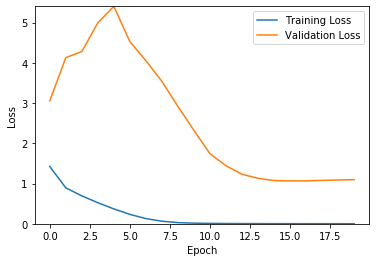

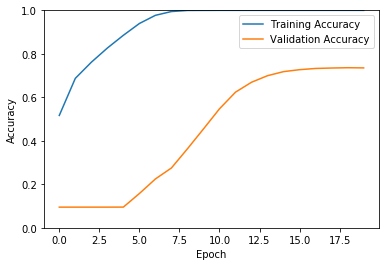

In [10]:
histPlot(history)

In [11]:
scores = model1.evaluate(x_test, onehot_y_test, verbose=0)
scores[1]

0.7099000215530396

In [27]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)       

CIFAR-10 Grayscale

In [0]:
model2, history = simple_CNN_model(x_train_gray, onehot_y_train, 32, 1, e=10)

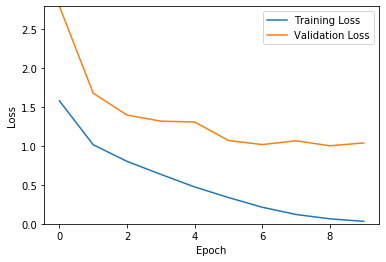

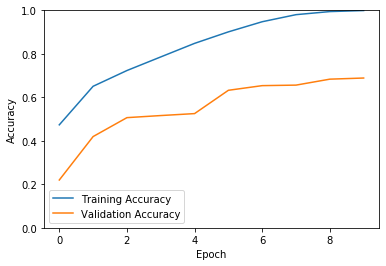

In [14]:
histPlot(history)

In [15]:
scores = model2.evaluate(x_test_gray, onehot_y_test, verbose=0)
scores[1]

0.6818000078201294

In [28]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 64)       

Fashion MNIST

In [0]:
model3, history = simple_CNN_model(trainX[:,:,:,np.newaxis], onehot_trainY, 28, 1, e=15)

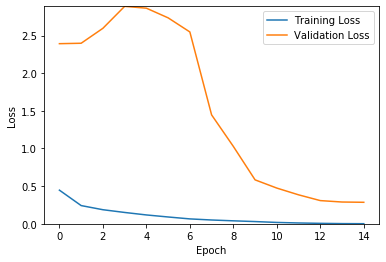

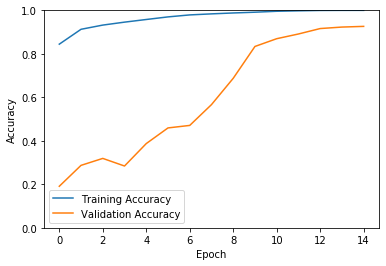

In [18]:
histPlot(history)

In [19]:
scores = model3.evaluate(testX[:,:,:,np.newaxis], onehot_testY, verbose=0)
scores[1]

0.9248999953269958

In [20]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_11 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_13 (Batc (None, 14, 14, 64)       

# Implement NN Using Keras

Flatten images into vector format for non-convolutional algos

In [0]:
def to_vec(data):
  return np.reshape(data,(data.shape[0],-1))

x_train = to_vec(x_train)
x_train_gray = to_vec(x_train_gray)
trainX = to_vec(trainX)

x_test = to_vec(x_test)
x_test_gray = to_vec(x_test_gray)
testX = to_vec(testX)

Define Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adagrad, Adam

def simple_NN_model(X, Y, e, data_set=0):

  if data_set == 0: # MNIST
    n = 490
  elif data_set == 1: # full color CIFAR-10
    n = 303
  else: # grayscale CIFAR-10
    n = 532

  model = Sequential([
    # Input Layer, Hidden layer
    Dense(n, use_bias=False, input_shape=(X.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),

    Dense(n, use_bias=False, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),

    Dense(n, use_bias=False, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Activation('relu'),

    # Output layer
    Dense(10,use_bias=False),
    BatchNormalization(),
    Activation('softmax'),
  ])

  model.compile(
    Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

  history = model.fit(X, Y, epochs=e, batch_size=1024, validation_split=0.2)

  return model, history


Fashion MNIST Training

In [30]:
model, history = simple_NN_model(trainX, onehot_trainY, e=20, data_set=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 37us/step - loss: 2.2063 - accuracy: 0.8151 - val_loss: 2.9332 - val_accuracy: 0.7662
Epoch 2/20
48000/48000 [==============================] - 1s 21us/step - loss: 1.6447 - accuracy: 0.8811 - val_loss: 2.4409 - val_accuracy: 0.8133
Epoch 3/20
48000/48000 [==============================] - 1s 21us/step - loss: 1.2872 - accuracy: 0.8982 - val_loss: 2.1100 - val_accuracy: 0.8040
Epoch 4/20
48000/48000 [==============================] - 1s 20us/step - loss: 1.0374 - accuracy: 0.9065 - val_loss: 1.8362 - val_accuracy: 0.7868
Epoch 5/20
48000/48000 [==============================] - 1s 20us/step - loss: 0.8557 - accuracy: 0.9139 - val_loss: 1.5970 - val_accuracy: 0.8192
Epoch 6/20
48000/48000 [==============================] - 1s 19us/step - loss: 0.7264 - accuracy: 0.9199 - val_loss: 1.4123 - val_accuracy: 0.8058
Epoch 7/20
48000/48000 [==============================] - 1s 20us/st

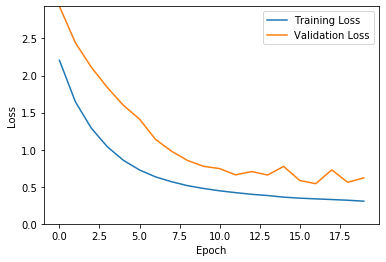

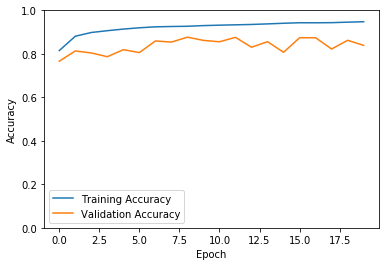

In [31]:
histPlot(history)

In [32]:
scores = model.evaluate(testX, onehot_testY, verbose=0)
scores[1]

0.8349000215530396

CIFAR-10 Training

In [33]:
model2, history2 = simple_NN_model(x_train, onehot_y_train, e=20, data_set=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 2s 54us/step - loss: 2.8521 - accuracy: 0.3919 - val_loss: 3.1643 - val_accuracy: 0.2241
Epoch 2/20
40000/40000 [==============================] - 2s 38us/step - loss: 2.4458 - accuracy: 0.4846 - val_loss: 2.8340 - val_accuracy: 0.3170
Epoch 3/20
40000/40000 [==============================] - 2s 38us/step - loss: 2.1808 - accuracy: 0.5231 - val_loss: 2.7037 - val_accuracy: 0.3375
Epoch 4/20
40000/40000 [==============================] - 2s 38us/step - loss: 1.9878 - accuracy: 0.5509 - val_loss: 2.5003 - val_accuracy: 0.3747
Epoch 5/20
40000/40000 [==============================] - 2s 38us/step - loss: 1.8318 - accuracy: 0.5798 - val_loss: 2.4590 - val_accuracy: 0.3647
Epoch 6/20
40000/40000 [==============================] - 2s 38us/step - loss: 1.7179 - accuracy: 0.5979 - val_loss: 2.4711 - val_accuracy: 0.3295
Epoch 7/20
40000/40000 [==============================] - 2s 38us/st

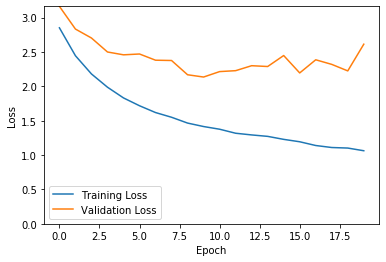

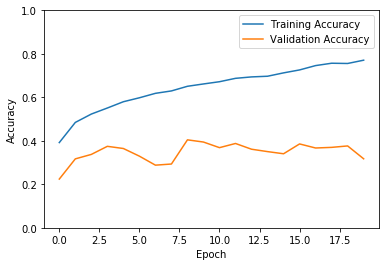

In [34]:
histPlot(history2)

In [35]:
scores = model2.evaluate(x_test, onehot_y_test, verbose=0)
scores[1]

0.31709998846054077

CIFAR-10 on Grayscale

In [36]:
model3, history3 = simple_NN_model(x_train_gray, onehot_y_train, e=20, data_set=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 1s 35us/step - loss: 3.5109 - accuracy: 0.3446 - val_loss: 4.2373 - val_accuracy: 0.1945
Epoch 2/20
40000/40000 [==============================] - 1s 18us/step - loss: 2.9530 - accuracy: 0.4299 - val_loss: 3.2788 - val_accuracy: 0.2149
Epoch 3/20
40000/40000 [==============================] - 1s 17us/step - loss: 2.5835 - accuracy: 0.4670 - val_loss: 3.2879 - val_accuracy: 0.1689
Epoch 4/20
40000/40000 [==============================] - 1s 17us/step - loss: 2.3282 - accuracy: 0.4931 - val_loss: 2.9355 - val_accuracy: 0.2415
Epoch 5/20
40000/40000 [==============================] - 1s 17us/step - loss: 2.1293 - accuracy: 0.5195 - val_loss: 2.7600 - val_accuracy: 0.2386
Epoch 6/20
40000/40000 [==============================] - 1s 17us/step - loss: 1.9784 - accuracy: 0.5411 - val_loss: 2.7563 - val_accuracy: 0.2243
Epoch 7/20
40000/40000 [==============================] - 1s 17us/st

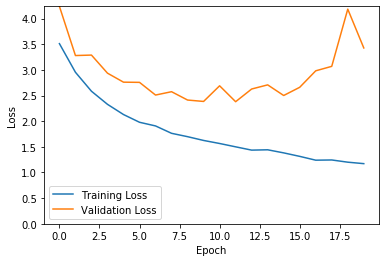

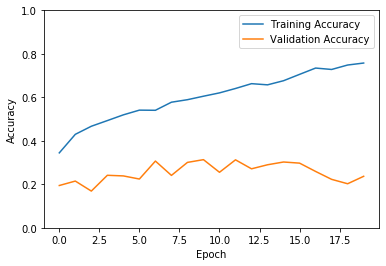

In [37]:
histPlot(history3)

In [38]:
scores = model3.evaluate(x_test_gray, onehot_y_test, verbose=0)
scores[1]

0.22789999842643738

# Train model using SVMs

In [0]:
from sklearn.svm import LinearSVC
# from thundersvm import SVC
from sklearn.model_selection import GridSearchCV

svc = LinearSVC()
# svc = SVC()
params = {
    'C': [0.003, 0.01, 0.03, 0.1]
}
gs = GridSearchCV(svc, params,n_jobs=-1,verbose=1,cv=5)

gs.fit(trainX, trainY)

print(gs.best_params_)
print(gs.best_estimator_.score(testX, testY))

In [0]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

svc = LinearSVC()
params = {
    'C': [0.01, 0.03, 0.1, 0.3]
}
gs2 = GridSearchCV(svc, params,n_jobs=-1,verbose=1,cv=5)

gs2.fit(x_train_gray, y_train)

print(gs2.best_params_)
print(gs2.best_estimator_.score(x_test_gray, y_test))

# Plot validation curves for SVMs

In [0]:
train_scores = []
test_scores = []
iters = [1, 2, 3, 4, 5, 10, 30, 100, 300, 1000]
for n in iters:
  svc = LinearSVC(**gs.best_params_, max_iter=n, tol=1E-12).fit(trainX,trainY)
  train_scores += [svc.score(trainX,trainY)]
  test_scores += [svc.score(testX, testY)]

In [0]:
plt.plot(iters,train_scores, label='Training Accuracy')
plt.plot(iters,test_scores, label='Test Accuracy')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.ylim(0.0, 1.0)
plt.legend()
plt.show()